# 이외의 다양한 차원 축소 기법

---
## 랜덤 투영
**Random projection** . 랜덤한 선형 투영을 사용해 데이터를 저차원 공간으로 투영함.  
믿기진 않지만 랜덤 투영이 실제로 거리를 잘 보존하는 것으로 증명됐다고 함. 차원 축소의 품질은 샘플 수와 목표 차원수에 따라 다름. 그런데 놀랍게도 초기 차원수에는 의존하지 않다고 함. **sklearn.random_projection** 참고  

---
## 다차원 스케일링
**Multidimensional scaling (MDS)** . 샘플간의 거리를 보존하면서 차원을 축소함.

---
## Isomap
각 샘플을 가장 가까운 이웃과 연결하는 식으로 그래프를 만듦. 그런 다음 샘플간의 **지오데식 거리(geodesic distance)** 를 유지하면서 차원을 축소함.

---
## t-SNE
**t-distributed stochastic neighbor embedding** . 비슷한 샘플은 가까이, 비슷하지 않은 샘플은 멀리 떨어지도록 하면서 차원을 축소함.  **주로 시각화에 많이 사용함** . 특히 고차원 공간에 있는 샘플의 군집을 시각화할 때 사용됨. (예를 들면 mnist를 2D로 시각화할 때)

---
## 선형 판별 분석
**linear discriminant analysis (LDA)** . 분류 알고리즘임. 하지만 학습 과정에서 클래스 사이를 가장 잘 구분하는 축을 학습함.  
이 축은 데이터가 투영되는 초평면을 정의하는데 사용할 수 있음. 이 알고리즘의 장점은 투영을 통해 가능한 한 클래스를 멀리 떨어지게 유지시키므로 **SVM 분류기 같은 다른 분류 알고리즘을 적용하기 전에 차원을 축소하는데 좋음**

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1)
x, y = mnist["data"], mnist["target"]
x_train, x_test = x[: 60000], x[60000: ]
y_train, y_test = y[: 60000], y[60000: ]

In [2]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, random_state=42)

In [7]:
import pandas as pd

temp_x = x_train[: 10000]
temp_y = pd.to_numeric(y_train[: 10000])

In [4]:
temp_x_re = tsne.fit_transform(temp_x)

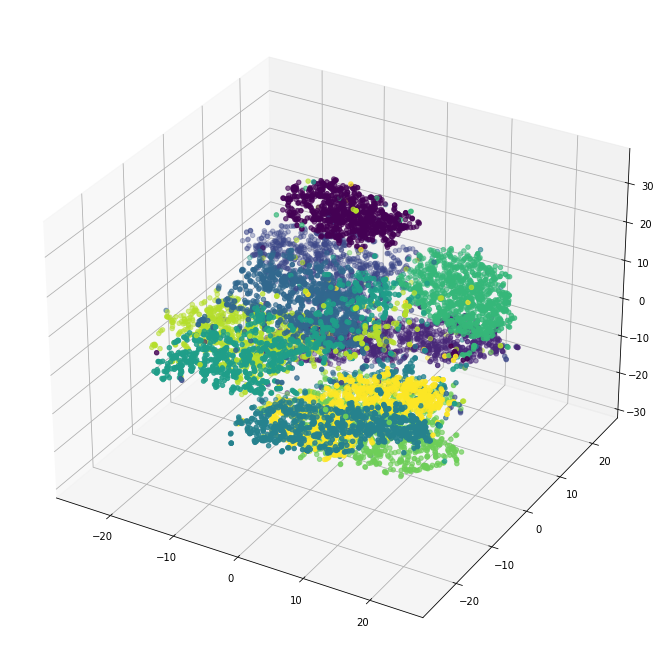

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(temp_x_re[:, 0], temp_x_re[:, 1], temp_x_re[:, 2], c=temp_y.to_numpy())
plt.show()